2 hidden layers with 10 nodes in each layer

Iteration:  0
[5 5 5 ... 5 5 5] [9 7 1 ... 3 1 5]
Accuracy:  0.09146341463414634 

Iteration:  10
[3 7 3 ... 5 3 7] [9 7 1 ... 3 1 5]
Accuracy:  0.1705609756097561 

Iteration:  20
[3 3 3 ... 7 3 0] [9 7 1 ... 3 1 5]
Accuracy:  0.2565609756097561 

Iteration:  30
[6 7 1 ... 1 1 0] [9 7 1 ... 3 1 5]
Accuracy:  0.3184390243902439 

Iteration:  40
[6 7 1 ... 1 6 0] [9 7 1 ... 3 1 5]
Accuracy:  0.37509756097560976 

Iteration:  50
[6 7 1 ... 1 6 0] [9 7 1 ... 3 1 5]
Accuracy:  0.4336341463414634 

Iteration:  60
[6 7 1 ... 1 6 5] [9 7 1 ... 3 1 5]
Accuracy:  0.48873170731707316 

Iteration:  70
[9 7 1 ... 1 6 6] [9 7 1 ... 3 1 5]
Accuracy:  0.5342439024390244 

Iteration:  80
[9 7 1 ... 2 1 6] [9 7 1 ... 3 1 5]
Accuracy:  0.5709512195121951 

Iteration:  90
[9 7 1 ... 2 1 6] [9 7 1 ... 3 1 5]
Accuracy:  0.6030975609756097 

Iteration:  100
[9 7 1 ... 2 1 5] [9 7 1 ... 3 1 5]
Accuracy:  0.6288292682926829 

Iteration:  110
[9 7 1 ... 2 1 5] [9 7 1 ... 3 1 5]
Accuracy:  0.650219512195122 

I

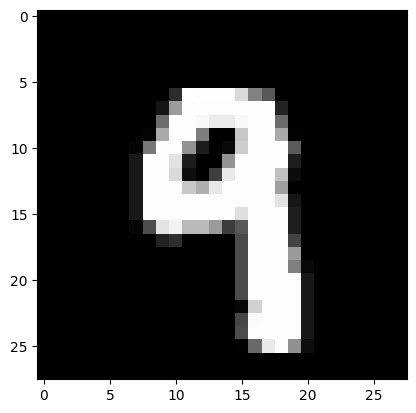


Prediction:  [7]
Label:  7


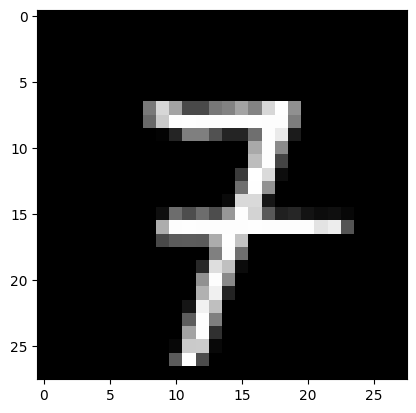


Prediction:  [1]
Label:  1


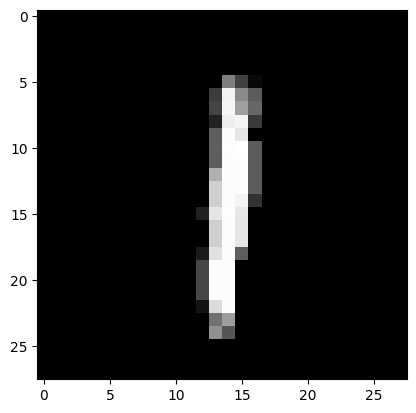


Prediction:  [3]
Label:  8


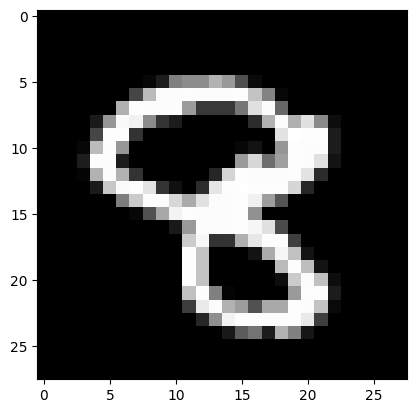

[0 3 0 6 5 1 7 5 9 1 1 9 5 8 1 6 0 8 0 5 5 6 0 8 5 4 3 2 8 1 8 4 2 0 9 9 2
 0 1 9 4 9 8 5 0 2 2 8 5 5 2 1 1 6 3 6 0 0 4 6 6 7 2 9 3 0 1 4 7 1 8 0 3 3
 6 9 8 4 1 4 1 2 4 7 2 7 9 4 7 5 2 8 1 7 2 2 6 7 2 8 4 0 9 6 4 2 6 5 7 8 8
 2 0 7 1 1 8 1 5 5 1 4 3 1 5 8 8 4 6 1 6 1 3 7 5 4 0 1 2 8 7 6 4 4 5 0 0 7
 8 1 2 5 8 9 0 3 8 8 7 6 0 5 5 6 9 6 3 5 3 1 6 2 9 0 4 9 4 2 3 9 9 6 1 7 2
 0 0 0 7 6 5 7 7 3 9 4 5 7 2 2 6 9 1 3 0 7 2 9 9 8 2 3 6 6 9 4 7 3 4 5 4 0
 5 4 3 0 0 3 0 4 9 0 0 5 8 8 0 2 8 8 4 8 2 9 1 9 8 9 6 7 7 3 0 2 3 2 0 6 8
 0 6 6 4 5 4 9 5 3 1 7 8 4 9 3 7 4 8 6 9 9 2 8 1 3 3 2 8 1 4 8 1 9 9 3 1 3
 9 8 3 4 1 9 8 8 2 5 2 7 6 7 1 7 2 4 7 5 7 8 1 5 1 2 2 1 4 4 9 0 8 4 7 2 9
 6 7 0 4 8 6 3 9 8 4 1 3 8 7 6 3 0 1 4 9 6 0 7 4 8 0 4 6 6 3 7 4 1 2 8 0 7
 7 3 0 4 8 6 5 4 0 3 2 8 7 8 0 0 7 9 6 4 2 2 5 7 0 2 3 9 4 6 2 7 0 6 2 8 7
 5 5 3 3 0 2 8 0 8 3 5 9 5 2 7 6 7 3 2 1 7 9 8 4 2 9 9 4 2 1 0 0 3 5 0 5 6
 6 6 1 3 2 9 8 7 8 5 5 7 8 8 2 7 6 9 3 8 6 0 6 3 5 5 8 9 2 2 3 1 4 4 9 6 5
 1 2 0 3 1 7 2 4 8 8 3 2 

0.84

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/train.csv')
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def ReLU_deriv(Z):
    return Z > 0

def init_params():
    np.random.seed(39)
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy: ", get_accuracy(predictions, Y), "\n")
    return W1, b1, W2, b2

W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("\nPrediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

print("\n")

test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)

print("\n")

get_accuracy(dev_predictions, Y_dev)


2 hidden layers, 20 nodes in first layer, 10 nodes in second layer

Iteration:  0
[8 3 3 ... 8 3 8] [3 4 5 ... 7 4 4]
Accuracy:  0.11851219512195121 

Iteration:  10
[5 9 9 ... 5 4 8] [3 4 5 ... 7 4 4]
Accuracy:  0.2438780487804878 

Iteration:  20
[3 9 9 ... 6 4 8] [3 4 5 ... 7 4 4]
Accuracy:  0.3556341463414634 

Iteration:  30
[3 9 4 ... 6 4 4] [3 4 5 ... 7 4 4]
Accuracy:  0.46214634146341466 

Iteration:  40
[3 9 4 ... 6 4 4] [3 4 5 ... 7 4 4]
Accuracy:  0.5542439024390244 

Iteration:  50
[3 9 4 ... 6 4 4] [3 4 5 ... 7 4 4]
Accuracy:  0.6122926829268293 

Iteration:  60
[3 4 4 ... 6 4 4] [3 4 5 ... 7 4 4]
Accuracy:  0.6517560975609756 

Iteration:  70
[3 4 4 ... 6 4 4] [3 4 5 ... 7 4 4]
Accuracy:  0.6805365853658537 

Iteration:  80
[3 4 5 ... 6 4 4] [3 4 5 ... 7 4 4]
Accuracy:  0.7044634146341463 

Iteration:  90
[3 4 5 ... 6 4 4] [3 4 5 ... 7 4 4]
Accuracy:  0.7232195121951219 

Iteration:  100
[3 4 5 ... 6 4 4] [3 4 5 ... 7 4 4]
Accuracy:  0.7384878048780488 

Iteration:  110
[3 4 5 ... 6 4 4] [3 4 5 ... 7 4 4]
Accuracy:  0.7520731707317073 

I

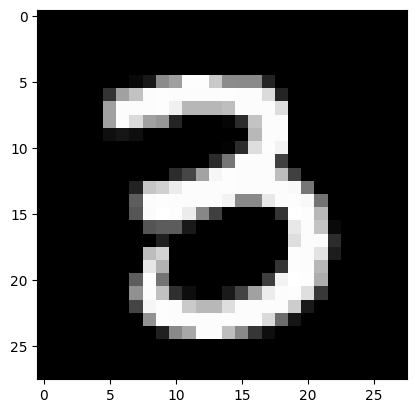


Prediction:  [9]
Label:  4


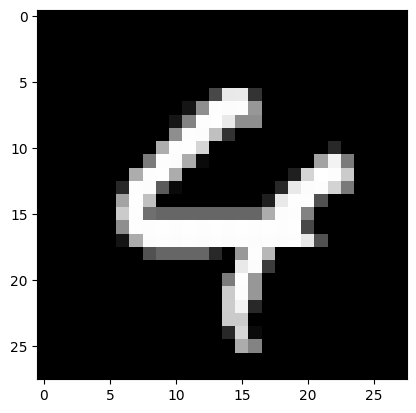


Prediction:  [5]
Label:  5


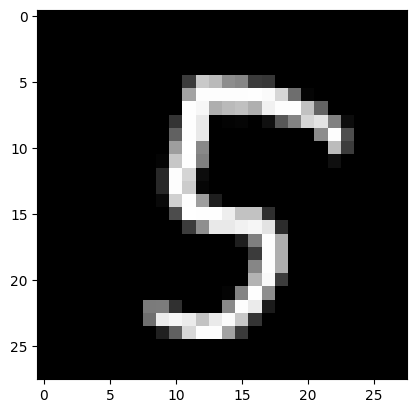


Prediction:  [8]
Label:  8


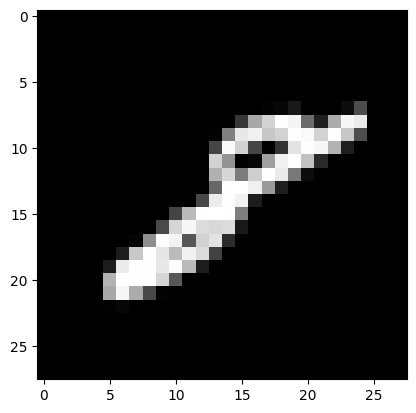



[9 0 9 4 2 1 2 5 4 7 9 5 7 7 7 8 1 6 6 6 3 1 9 3 2 7 3 8 3 7 3 8 1 1 7 1 4
 0 0 7 7 7 3 5 3 6 6 2 5 6 1 5 1 8 0 2 8 4 3 8 4 8 0 9 1 7 9 6 9 2 3 9 1 7
 6 4 3 9 5 9 7 1 7 1 1 8 3 7 3 9 9 3 6 2 7 5 4 1 1 9 7 6 1 7 3 1 4 6 9 2 5
 1 8 7 3 0 7 2 9 1 6 2 6 9 8 9 0 9 0 2 5 3 0 1 7 6 3 5 1 5 1 6 4 7 3 7 4 8
 3 4 2 8 4 7 1 9 1 8 5 5 0 9 8 0 4 4 3 2 9 3 5 7 6 4 8 1 2 7 4 3 2 4 0 1 1
 1 8 3 6 6 7 1 7 6 5 8 8 8 4 6 1 2 5 1 3 4 7 5 0 1 4 6 5 0 3 4 3 7 8 5 4 2
 1 7 4 6 1 2 8 7 0 1 6 4 3 2 3 1 9 0 3 4 9 6 8 0 0 0 3 7 8 8 2 9 5 7 5 4 7
 7 9 0 5 4 9 2 3 8 1 7 2 4 5 0 1 9 0 0 7 8 5 9 1 6 8 5 7 4 8 0 7 8 9 4 0 5
 2 1 2 3 3 3 7 0 7 3 7 9 3 1 4 5 7 2 9 1 0 3 1 7 6 3 8 5 1 2 8 5 1 1 8 9 1
 6 7 7 7 2 6 9 2 3 1 8 1 4 4 2 6 4 9 1 7 8 5 5 1 6 7 2 4 8 7 3 9 9 5 2 5 1
 6 6 6 8 4 3 1 4 0 5 3 7 5 3 3 8 3 3 9 8 9 1 2 1 7 0 7 9 2 0 6 5 7 0 1 5 0
 4 7 9 2 0 5 1 0 5 8 9 3 0 8 6 1 0 8 7 6 6 3 5 8 1 5 0 9 1 0 2 3 6 3 1 2 5
 7 8 9 3 7 5 8 3 9 6 0 6 9 4 9 2 7 8 8 4 5 4 3 6 7 4 4 4 7 2 9 6 8 6 1 3 6
 5 0 7 5 1 4 2 9 3 6 0 

0.859

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/train.csv')
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def ReLU_deriv(Z):
    return Z > 0

def init_params():
    np.random.seed(39)
    W1 = np.random.rand(20, 784) - 0.5
    b1 = np.random.rand(20, 1) - 0.5
    W2 = np.random.rand(10, 20) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy: ", get_accuracy(predictions, Y), "\n")
    return W1, b1, W2, b2

W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("\nPrediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

print("\n")

test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)

print("\n")

get_accuracy(dev_predictions, Y_dev)